# Exercise 1: Train a Model from IRIS DB using Bayes Method

In [53]:
# pandas to load data
import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB

# https://github.com/datsoftlyngby/soft2022spring-DS/blob/main/Code/E10-1-Iris-Bayes.ipynb

In [24]:
# Load dataset 
url = ("https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data")
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'Species']
dataset = pd.read_csv(url, names=names)


In [25]:
dataset.head(10)

,sepal-length,sepal-width,petal-length,petal-width,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [26]:
dataset.tail(10)

,sepal-length,sepal-width,petal-length,petal-width,Species
140,6.7,3.1,5.6,2.4,Iris-virginica
141,6.9,3.1,5.1,2.3,Iris-virginica
142,5.8,2.7,5.1,1.9,Iris-virginica
143,6.8,3.2,5.9,2.3,Iris-virginica
144,6.7,3.3,5.7,2.5,Iris-virginica
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [27]:
dataset.shape

(150, 5)

In [28]:
dataset.groupby('Species').mean()

,sepal-length,sepal-width,petal-length,petal-width
Species,,,,
Iris-setosa,5.006,3.418,1.464,0.244
Iris-versicolor,5.936,2.770,4.260,1.326
Iris-virginica,6.588,2.974,5.552,2.026


In [29]:
dataset.groupby('Species').size()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

In [30]:
dataset.describe()

,sepal-length,sepal-width,petal-length,petal-width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [36]:
setosa = dataset.loc[(dataset["Species"] == "Iris-setosa")]
versicolor = dataset.loc[(dataset["Species"] == "Iris-versicolor")]
virginica = dataset.loc[(dataset["Species"] == "Iris-virginica")]

In [39]:
setosa.describe()

,sepal-length,sepal-width,petal-length,petal-width
count,50.00000,50.000000,50.000000,50.00000
mean,5.00600,3.418000,1.464000,0.24400
std,0.35249,0.381024,0.173511,0.10721
min,4.30000,2.300000,1.000000,0.10000
25%,4.80000,3.125000,1.400000,0.20000
50%,5.00000,3.400000,1.500000,0.20000
75%,5.20000,3.675000,1.575000,0.30000
max,5.80000,4.400000,1.900000,0.60000


sepal-length       AxesSubplot(0.125,0.536818;0.352273x0.343182)
sepal-width     AxesSubplot(0.547727,0.536818;0.352273x0.343182)
petal-length          AxesSubplot(0.125,0.125;0.352273x0.343182)
petal-width        AxesSubplot(0.547727,0.125;0.352273x0.343182)
dtype: object

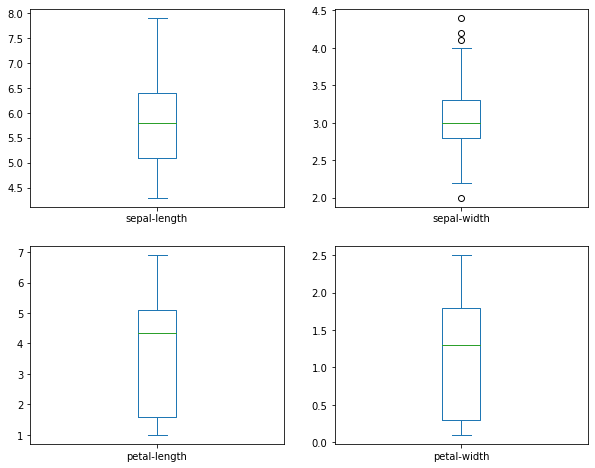

In [44]:
dataset.plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False, figsize=(10,8))

**Removing outliers to make better test and train data**

In [61]:
# position of outlier
np.where(dataset['sepal-width']>4.0)

(array([15, 32, 33], dtype=int64),)

In [62]:
np.where(dataset['sepal-width']<2.2)

(array([60], dtype=int64),)

In [63]:
dataset.drop(dataset.index[[15, 32, 33, 60]], inplace=True)

sepal-length       AxesSubplot(0.125,0.536818;0.352273x0.343182)
sepal-width     AxesSubplot(0.547727,0.536818;0.352273x0.343182)
petal-length          AxesSubplot(0.125,0.125;0.352273x0.343182)
petal-width        AxesSubplot(0.547727,0.125;0.352273x0.343182)
dtype: object

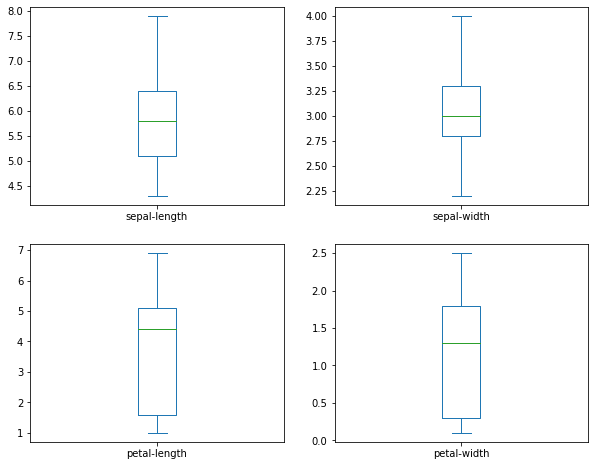

In [64]:
dataset.plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False, figsize=(10,8))

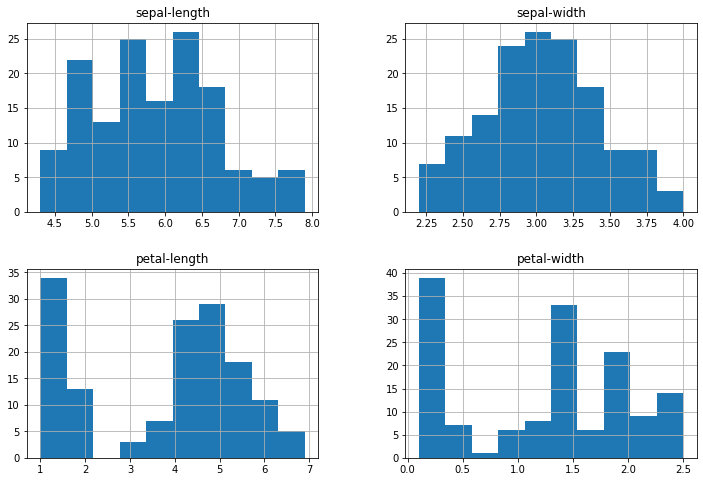

In [65]:
dataset.hist(figsize=(12,8))
plt.show()

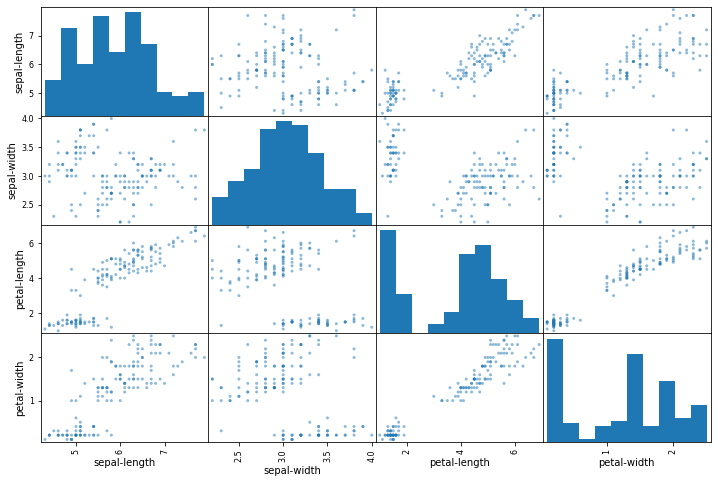

In [66]:
# Draw Multivariate Plots - scatterplots 
# These plots show the observed relationships between the attributes
scatter_matrix(dataset, figsize=(12,8))
plt.show()

### Step 5. Training

In [67]:
# Convert the data into sub arrays
array = dataset.values
#Subarrays
X = array[:, 0:4] # data without class
y = array[:, 4] # just class

In [80]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.3, random_state=7)



Now we have training data X_train and y_train and validation data X_test and y_test

We are ready to apply algorithms for training a model from our data. We try Gaussian Naive Bayes (NB).


### Choose a method

In [81]:
model = GaussianNB()
model.fit(X_train, y_train)

GaussianNB()

In [82]:
model.score(X_test, y_test) #Tells how precise the fit is

0.9318181818181818

In [83]:
model.score(X_train, y_train) # Better score, because it was trained on the train data.

0.9705882352941176

In [84]:
# Test on the test data, try predict
prediction = model.predict(X_test)
prediction

array(['Iris-setosa', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-virginica', 'Iris-virginica', 'Iris-setosa',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-setosa', 'Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-virginica',
       'Iris-versicolor'], dtype='<U15')

In [86]:
prediction.shape

(44,)

# Step 6: Evaluation

We need a metrics for the model evaluation.
The ‘accuracy‘ is the percentage [%] of correctly predicted instances from the total number of instances in the dataset.


In [87]:
# Set metrix
scoring = 'accuracy'

Now we can try the model on our validation set.

In [88]:
prediction = model.predict(X_test)

In [89]:
X_test

array([[4.8, 3.4, 1.6, 0.2],
       [6.4, 2.8, 5.6, 2.1],
       [5.0, 3.5, 1.3, 0.3],
       [5.0, 3.2, 1.2, 0.2],
       [7.1, 3.0, 5.9, 2.1],
       [6.4, 2.7, 5.3, 1.9],
       [6.3, 3.4, 5.6, 2.4],
       [7.7, 2.8, 6.7, 2.0],
       [6.4, 2.9, 4.3, 1.3],
       [5.5, 2.4, 3.8, 1.1],
       [5.9, 3.0, 5.1, 1.8],
       [6.9, 3.1, 5.4, 2.1],
       [5.1, 3.8, 1.9, 0.4],
       [6.5, 3.2, 5.1, 2.0],
       [6.7, 2.5, 5.8, 1.8],
       [5.7, 2.5, 5.0, 2.0],
       [6.0, 3.0, 4.8, 1.8],
       [6.9, 3.1, 4.9, 1.5],
       [6.5, 2.8, 4.6, 1.5],
       [6.7, 3.1, 4.7, 1.5],
       [5.1, 3.4, 1.5, 0.2],
       [5.6, 2.5, 3.9, 1.1],
       [5.9, 3.2, 4.8, 1.8],
       [5.7, 2.8, 4.1, 1.3],
       [6.0, 2.2, 5.0, 1.5],
       [6.9, 3.1, 5.1, 2.3],
       [5.0, 3.5, 1.6, 0.6],
       [5.3, 3.7, 1.5, 0.2],
       [5.5, 2.4, 3.7, 1.0],
       [5.1, 3.3, 1.7, 0.5],
       [6.0, 3.4, 4.5, 1.6],
       [4.7, 3.2, 1.6, 0.2],
       [6.4, 3.1, 5.5, 1.8],
       [6.1, 3.0, 4.9, 1.8],
       [6.5, 3

In [90]:
# Calculated accuracy of the model over the validation set
print(accuracy_score(y_test, prediction))

0.9318181818181818


In [91]:
# Confusion matrix provides an indication of the the errors of prediction
print(confusion_matrix(y_test, prediction))

[[11  0  0]
 [ 0 13  1]
 [ 0  2 17]]


In [92]:
# Classification report provides a breakdown of each class by precision, recall, f1-score and support
print(classification_report(y_test, prediction))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       0.87      0.93      0.90        14
 Iris-virginica       0.94      0.89      0.92        19

       accuracy                           0.93        44
      macro avg       0.94      0.94      0.94        44
   weighted avg       0.93      0.93      0.93        44



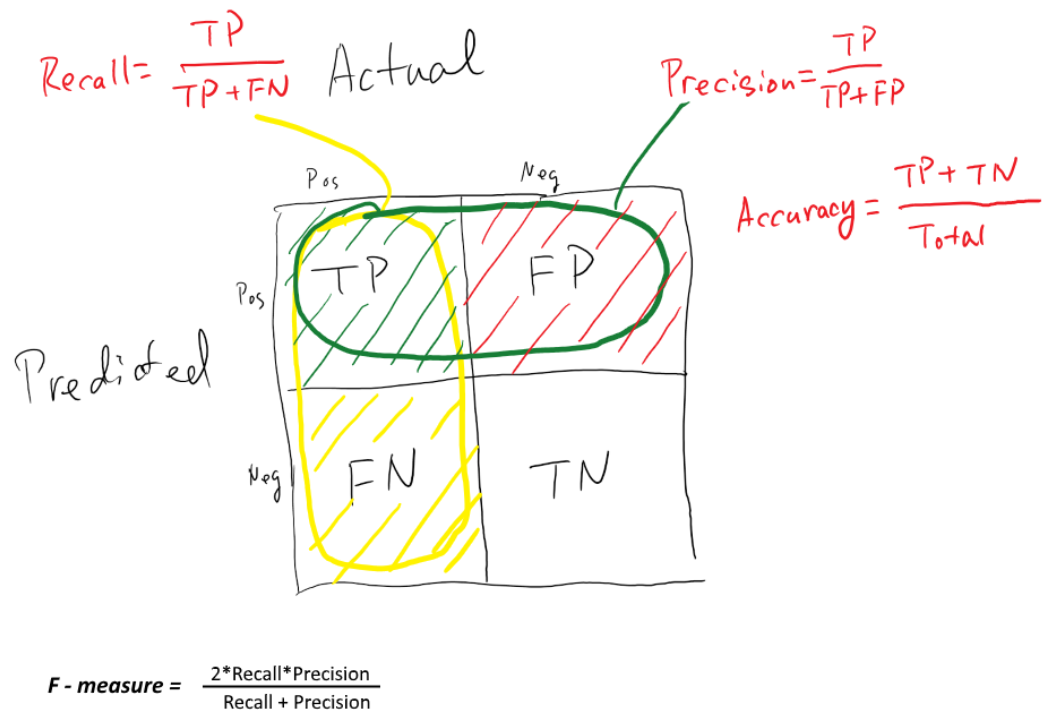

### Step 7. Testing

In [96]:
#Testing with new data
# m = array[[[5] [3] [1] [0]]]
#m = [[5.7,1.0,5.6,2.6]]

#nr one from dataset
m = [[5.1,3.5,1.4, 0.2]] 
k = [[5.4, 3.7, 1.5, 0.2]]
my_prediction = model.predict(m)
my_prediction

array(['Iris-setosa'], dtype='<U15')

In [97]:
# Calculate the accuracy of the model with the test set
print(accuracy_score(y_test, prediction))

0.9318181818181818


In [98]:
# Evaluate classifier performance
from sklearn.metrics import classification_report
class_names = ['virginia', 'serosa', 'versicolor']
print("\n" + "#"*40)


########################################


In [99]:
print("\nClassifier performance on training dataset\n")
print(classification_report(y_train, model.predict(X_train), target_names=class_names))
print("#"*40 + "\n")


Classifier performance on training dataset

              precision    recall  f1-score   support

    virginia       1.00      1.00      1.00        36
      serosa       0.94      0.97      0.96        35
  versicolor       0.97      0.94      0.95        31

    accuracy                           0.97       102
   macro avg       0.97      0.97      0.97       102
weighted avg       0.97      0.97      0.97       102

########################################



In [100]:
print("\nClassifier performance on test dataset\n")
print(classification_report(y_test, prediction, target_names=class_names))


Classifier performance on test dataset

              precision    recall  f1-score   support

    virginia       1.00      1.00      1.00        11
      serosa       0.87      0.93      0.90        14
  versicolor       0.94      0.89      0.92        19

    accuracy                           0.93        44
   macro avg       0.94      0.94      0.94        44
weighted avg       0.93      0.93      0.93        44





The results are not perfect, f1-score differ in the two sub-sets.
More methods can be tried.


### Step 8. Improvement

In [101]:
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [102]:
# We store each trained model into array called models[]
models = []
models.append(('LR', LogisticRegression()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
# See the various parameters of each model and their default values
#models

We will traing the models several times each, in randomly generated splits.
A pseudo-random generator is used (in means, not totally random, but using a very large repeatable sequence of options).
A seed is an initial value that is fed into the pseudo random number generator as a start of the process of random number generation. If it is not specified, it is selected randomly. As we want to use the same randomization procedure for our six trainings, we want to make it fixed and known. Then the results of different tests are directly comparable.

In [103]:
# Give a fixed value for seed to be used in all tests
seed = 7

# Give fixed value for the number of repeted trainings of one model
num_repeat = 10

In [104]:
# Set the metrix
scoring = 'accuracy'

In [105]:
# Run all the algorithms and store their results in results[] and names in names[]
# For each we use the specific parameters preliminary stored in modelss[]
results = []
names = []
for name, model in models:
    # prepare randomization of splits
    kfold = model_selection.KFold(n_splits=num_repeat, random_state=seed, shuffle=True)
    
    # implement the model and calcilate a score based on 'accuracy' (scoring)
    cv_results = model_selection.cross_val_score(model, X_test, y_test, cv=kfold, scoring=scoring)
    
    # store the result of this method in array results[]
    results.append(cv_results)
    
    # store the name of this method in array names[]
    names.append(name)
    
    # tell what you have done so far
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)   
# repeat the same for next method

C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_resu

LR: 0.940000 (0.128062)
KNN: 0.960000 (0.080000)
CART: 0.885000 (0.116297)
NB: 0.940000 (0.128062)
SVM: 0.935000 (0.100125)


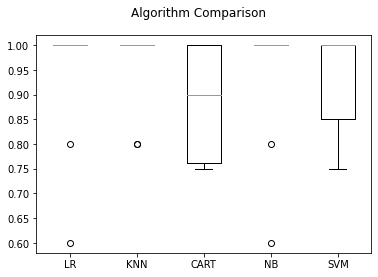

In [106]:
# Compare algorithms frame
fig = plt.figure()
fig.suptitle('Algorithm Comparison')

# x axis includes sub-plots
ax = fig.add_subplot(111)

# y axis result values
plt.boxplot(results)

# x axis labels
ax.set_xticklabels(names)

plt.show()

In [107]:


# Compare accuracy with KNN
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
predictions = knn.predict(X_test)

# Calculated accuracy of the model over the validation set
print(accuracy_score(y_test, predictions))

# Confusion matrix provides an indication of the three errors made ???? errors of predictions?
print(confusion_matrix(y_test, predictions))

# Classification report provides a breakdown of each class by precision, recall, f1-score and support ????
print(classification_report(y_test, predictions))



0.9545454545454546
[[11  0  0]
 [ 0 14  0]
 [ 0  2 17]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       0.88      1.00      0.93        14
 Iris-virginica       1.00      0.89      0.94        19

       accuracy                           0.95        44
      macro avg       0.96      0.96      0.96        44
   weighted avg       0.96      0.95      0.95        44

